# Gay and Lesbian Reddit Channels Compared

### Problem Statement:
Lesbians have a divorce rate twice as large as gay men.  Can we find any hints as to why by looking at differences in Gay and Lesbian subreddit groups?

### Import Libraries
I'm importing the libraries I need, then using Pushshift API. I am assigning the url and its parameters.  I'm using two params variables because I can only get 500 items at a time while using Pushshift.  After setting the parameters I set res to be the variable for obtaining the parameters. I check the status code to make sure I'm getting a 200 code, indicating that all is good.  

In [1]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 


In [2]:
url = 'https://api.pushshift.io/reddit/search/submission'

In [3]:
params = {'subreddit': 'GayMen', 'size':500,}

I used "'before':1561588193" as a timestamp to get the 500 posts prior to the 500th prior post in the first set of params.  I found the timestamp by checking posts[499].

In [4]:
params2 = {'subreddit': 'GayMen', 'size':500, 'before':1561588193}

In [5]:
res = requests.get(url, params)

In [6]:
res.status_code

200

In [7]:
res2 = requests.get(url, params2)

In [8]:
res2.status_code

200

### Creating a Gay Dataframe
Now I set 'data' and 'data2' equal to the json language that was returned for the first and second sets of parameters, respectively. After that, I set 'posts' and 'posts2' equal to 'data' and 'data2' respectively.   Finally, I created df and df2 as the dataframes. After, I narrowed down to just three columns (subreddit, selftext, and title), and saved them as copy so they're actual dataframes instead of a 'window' into the original dataframe.  I combined the dataframes with 'append', then reset the index because I initially had 0-499 and 0-499.  The index was reset to 0-999, and lastly I dropped the unnecessary old index.

In [9]:
data = res.json()

In [10]:
data2 = res2.json()

In [11]:
posts = data['data']

In [12]:
posts2 = data2['data']

In [13]:
df = pd.DataFrame(posts)

In [14]:
df2 = pd.DataFrame(posts2)

In [15]:
df2.shape

(500, 62)

In [16]:
df = df[['subreddit', 'selftext', 'title']].copy()

In [17]:
df2 = df2[['subreddit', 'selftext', 'title']].copy()

In [18]:
df;

In [19]:
df2;

In [20]:
df = df.append([df2])

In [21]:
df = df.reset_index()

In [22]:
df.drop('index', axis=1, inplace=True)

In [23]:
df.shape

(1000, 3)

### Create a Lesbian Dataframe
I'm basically repeating the steps from the gay dataframe.  I set the url and two sets of params, then set 'res' to obtain the parameters from the website.  I set 'data_l' (that's an L, not a number) equal to the json language that was returned for the set of parameters. After that, I set 'posts_l' (again, and L) equal to 'data_l'. Finally, I created df_l (with an L) as the dataframes. After, I narrowed down to just three columns (subreddit, selftext, and title), and saved it as a copy so it's a dataframes instead of a 'window' into the original dataframe. I repeated this with another round to create df_2I combined the dataframes with 'append', then reset the index because I initially had 0-499 and 0-499. The index was reset to 0-999, and lastly I dropped the unnecessary old index.

In [24]:
url_l = 'https://api.pushshift.io/reddit/search/submission'

In [25]:
params = {'subreddit': 'actuallesbians', 'size':500}

In [26]:
res = requests.get(url_l, params)

In [27]:
res.status_code

200

In [28]:
data_l = res.json()

In [29]:
data_l;

In [30]:
posts_l = data_l['data']

In [31]:
df_l = pd.DataFrame(posts_l)

In [32]:
posts_l[499];

In [33]:
df_l = df_l[['subreddit', 'selftext', 'title']].copy()

I used "'before':1579981097" as a timestamp to get the 500 posts prior to the 500th prior post in the first set of params.  I found the timestamp by checking posts_l[499].

In [34]:
params2 = {'subreddit': 'actuallesbians', 'size':500, 'before':1579981097}

In [35]:
res_2 = requests.get(url_l, params2)

In [36]:
res.status_code

200

In [37]:
data_l2 = res_2.json()

In [38]:
posts_l2 = data_l2['data']

In [39]:
df_l2 = pd.DataFrame(posts_l2)

In [40]:
df_l2.shape

(500, 75)

In [41]:
df_l2 = df_l2[['subreddit', 'selftext', 'title']].copy()

In [42]:
df_l = df_l.append([df_l2])

In [43]:
df_l = df_l.reset_index()

In [44]:
df_l.drop('index', axis=1, inplace=True)

In [45]:
df_l.head()

,subreddit,selftext,title
0,actuallesbians,I feel like I am the only lgbt person in my ci...,"Older adult WLW, where do you find each other?"
1,actuallesbians,Now I'm slowly coming to terms with my sexuali...,I rewatched Hot Chick (2002)
2,actuallesbians,,Anyone else watch I Am Not Okay With This? I h...
3,actuallesbians,,Booby Trapped!
4,actuallesbians,,Lesbian princess pt.2


### Combine Gays and Lesbians
I combined the two dataframes, reset the index, and deleted the new column 'index' that was formed.  This leaves me with 2000 rows and three columns.

In [46]:
df = df.append([df_l])

In [47]:
df.shape

(2000, 3)

In [48]:
df = df.reset_index()

In [49]:
df.drop('index', axis = 1, inplace = True)

### Clean the Data
I started by replacing 'Gaymen' with 1 and 'actuallesbians' with 0 so that I can have a positive/negative case. Afterwards, I combined the 'selftext' and 'title' columns to a new column called 'text'. I included a space between the two strings so none of the words were merged unintentionally.  Doing this allows me to compare one X with the one y.

In [50]:
df.head()

,subreddit,selftext,title
0,GayMen,Hello! I’m currently working on a project that...,Looking for guys to help me out with a photo p...
1,GayMen,I am a male with a best friend that I've known...,I don't know what to do..
2,GayMen,I don't think I'm a very good person. I don't ...,Maybe I am unlovable.
3,GayMen,I'm 68 now but I've always know I was differen...,Always Knew
4,GayMen,All the gay men are like first class race hors...,How do gay men get into relationships?


In [51]:
df.replace({'subreddit':{'GayMen':1}}, inplace = True);
#credit for code help http://queirozf.com/entries/pandas-dataframe-replace-examples

In [52]:
df.replace({'subreddit':{'actuallesbians':0}}, inplace = True);

In [53]:
df['text'] = df['selftext'] + ' ' + df['title']

In [54]:
cvec = CountVectorizer(ngram_range=(1,2), max_features = 1000, min_df = 2)

In [91]:
X = df['text'].fillna(' ')
y = df['subreddit']

I initially created the stopwords variable 'stop' lower in the notebook, but later moved it up so I could create my wordcloud  with the df unaltered, and apply stopwords to the code as well so I'm only getting useful words. The wordcloud isn't super useful, but I created it here for the purpose of using in my presentation.

In [56]:
stop = ['whenever', 'often', 'seeming', 'sometimes', 'whether', 'between', 'latter', 'so', 'nor', 'throughout', 'to', 'another', 'one', 'whereas', 'couldnt', 'ours', 'must', 'de', 'along', 'for', 'already', 'former', 'hence', 'amoungst', 'herein', 'because', 'however', 'perhaps', 'ever', 'sixty', 'besides', 'sometime', 'per', 'via', 'might', 'whence', 'here', 'inc', 'me', 'no', 'anyhow', 'describe', 'made', 'even', 'should', 'ourselves', 'may', 'much', 'thence', 'there', 'twelve', 'that', 'can', 'least', 'sincere', 'fire', 'in', 're', 'a', 'anything', 'why', 'becomes', 'among', 'bill', 'become', 'someone', 'will', 'after', 'each', 'elsewhere', 'itself', 'below', 'all', 'others', 'and', 'thereupon', 'while', 'how', 'if', 'hundred', 'we', 'still', 'beforehand', 'who', 'few', 'last', 'an', 'therefore', 'always', 'through', 'with', 'again', 'do', 'latterly', 'own', 'the', 'towards', 'none', 'hereupon', 'beside', 'then', 'full', 'had', 'it', 'was', 'now', 'side', 'cant', 'same', 'thin', 'rather', 'enough', 'down', 'ltd', 'amongst', 'everywhere', 'fifteen', 'thereby', 'wherein', 'whole', 'every', 'other', 'forty', 'are', 'hereby', 'some', 'ten', 'were', 'becoming', 'give', 'more', 'neither', 'most', 'third', 'seemed', 'etc', 'found', 'mostly', 'amount', 'cannot', 'though', 'both', 'have', 'whatever', 'namely', 'once', 'thereafter', 'wherever', 'move', 'without', 'next', 'beyond', 'almost', 'hasnt', 'as', 'only', 'fill', 'nevertheless', 'well', 'nine', 'onto', 'which', 'also', 'whither', 'many', 'moreover', 'behind', 'around', 'keep', 'these', 'indeed', 'top', 'whereafter', 'above', 'interest', 'less', 'anyway', 'or', 'this', 'what', 'two', 'please', 'is', 'find', 'yet', 'those', 'than', 'would', 'yours', 'its', 'where', 'upon', 'meanwhile', 'afterwards', 'due', 'within', 'anywhere', 'be', 'from', 'empty', 'nobody', 'therein', 'otherwise', 'your', 'nowhere', 'too', 'yourselves', 'together', 'several', 'about', 'you', 'by', 'not', 'first', 'am', 'front', 'ie', 'toward', 'else', 'whereupon', 'back', 'on', 'anyone', 'across', 'thru', 'six', 'has', 'part', 'never', 'something', 'nothing', 'get', 'i', 'eleven', 'co', 'everything', 'thus', 'everyone', 'mine', 'five', 'put', 'during', 'see', 'somehow', 'twenty', 'un', 'under', 'show', 'somewhere', 'against', 'whoever', 'done', 'been', 'could', 'further', 'into', 'con', 'until', 'whose', 'four', 'take', 'go', 'mill', 'at', 'system', 'seems', 'since', 'of', 'detail', 'whereby', 'my', 'three', 'myself', 'hereafter', 'being', 'up', 'eight', 'very', 'became', 'when', 'eg', 'whom', 'any', 'either', 'except', 'but', 'fifty', 'although', 'noone', 'such', 'over']

In [57]:
comment_words = ' '

for val in df.text:
    val = str(val)   
    tokens = val.split()       
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
#code from https://www.geeksforgeeks.org/generating-word-cloud-python/

In [58]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words)
#code from https://www.geeksforgeeks.org/generating-word-cloud-python/

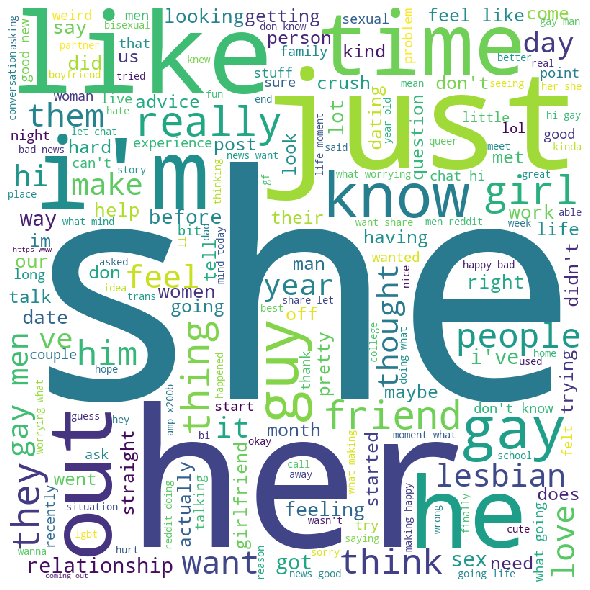

In [59]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
#plt.savefig('wordcloud.png')
#code from https://www.geeksforgeeks.org/generating-word-cloud-python/

### Preprocessing and Modeling
#### Model 1
I created my X_train/test and y_train/test with a test size of .33, stratified y, and random state of 42.  The y values are half 1 (gaymen) and half 0 (actuallesbian).  I created a pipe that count vectorizes and uses logistic regression.  The parameters to check against are the stopwords variable 'stop' that I adjusted, 500, 750, and 100 for maximum features to check against, minimum appearance in 3, 5, or 9 submissions, and ngram range of (1,1) and (1,2). I gridsearched with cv = 5.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [93]:
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [94]:
pipe = Pipeline([('cvec', CountVectorizer()),
                  ('lr', LogisticRegression())])

In [95]:
pipe_params = {
    'cvec__stop_words' : [stop],
    'cvec__max_features': [500, 750, 1000],
    'cvec__min_df': [3, 5, 9],
    'cvec__ngram_range': [(1,1), (1,2)]
}


In [96]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params,
                  cv=5)

I fit the grid search with the training data, then got my best score, best estimator, and train score. I observed my best parameters, and finally got my test score.

In [98]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [99]:
gs.best_score_

0.8104477611940298

In [67]:
gsmodel = gs.best_estimator_

In [68]:
gsmodel.score(X_train, y_train)

0.9462686567164179

In [69]:
gsmodel

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['whenever', 'often', 'seeming',
                                             'sometimes', 'whether', 'between',
                                             'latter', 'so', 'nor',
                                             'thro...
                                             'ever', 'sixty', ...],
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
     

In [100]:
gsmodel.score(X_test, y_test)

0.8212121212121212

#### Model 2
I created X_train/test and y_train/test again to make sure they're correct for my second model.  I create the pipe with TVEC and LogReg.  The params are the same as the first model, as is gridsearch. I then fit the model.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [102]:
tpipe = Pipeline([('tvec', TfidfVectorizer()),
                  ('lr', LogisticRegression(solver = "liblinear"))])

In [103]:
tpipe_params = {
    'tvec__stop_words' : [stop],
    'tvec__max_features': [500, 750, 1000],
    'tvec__min_df': [3, 5, 9],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [104]:
gst = GridSearchCV(tpipe, 
                  param_grid = tpipe_params,
                  cv=5)

In [105]:
gst.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

I obtain my best score, best estimator, X_train score, and show my model.  Finally, I show my X_test score.

In [106]:
gst.best_score_

0.817910447761194

In [121]:
gst_model = gst.best_estimator_

In [122]:
gst_model.score(X_train, y_train)

0.8962686567164179

In [123]:
gst_model

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['whenever', 'often', 'seeming',
                                             'sometimes', 'whether', 'betwee...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0,

In [124]:
gst_model.score(X_test, y_test)

0.896969696969697

#### Model 3
Again, I reset my X_train/test and y_train/test to make sure they are correct. I create my pipe with TVEC and MultinomialNB, then use the same pipe parameters as the previous two models.  Gridsearch cv = 5 again, and after running this I fit the model.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [112]:
mnb_pipe = Pipeline([('tvec', TfidfVectorizer()),
                  ('mnb', MultinomialNB())])

In [113]:
mnb_pipe_params = {
    'tvec__stop_words' : [stop],
    'tvec__max_features': [500, 750, 1000],
    'tvec__min_df': [3, 5, 9],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [114]:
gs_mnb = GridSearchCV(mnb_pipe, 
                  param_grid = mnb_pipe_params,
                  cv=5)

In [115]:
gs_mnb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

Again, I get my best score, best estimator, X_train score, show the best parameters, and get my X_test score.

In [116]:
gs_mnb.best_score_

0.8253731343283582

In [117]:
gs_mnb_model = gs_mnb.best_estimator_

In [118]:
gs_mnb_model.score(X_train, y_train)

0.8902985074626866

In [119]:
gs_mnb_model

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['whenever', 'often', 'seeming',
                                             'sometimes', 'whether', 'betwee...
                                             'one', 'whereas', 'couldnt',
                                             'ours', 'must', 'de', 'along',
                                             'for', 'already', 'former',
                                             'hence', 'amoungst', 'herein',
                      

In [120]:
gs_mnb_model.score(X_test, y_test)

0.8075757575757576